Загрузите датасет transaction_data.csv. 

Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 

Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

Сколько транзакций завершились ошибкой?

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [1]:
import pandas as pd

In [2]:
#Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
df=pd.read_csv('D:/KARPOV/5_transaction_data.csv')

In [3]:
df.head(3)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull


In [4]:
#размер таблицы
df.shape

(5315, 3)

In [5]:
#тип данных
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
#есть ли пропущенные значения
df.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
#описание
df.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
#Проверьте, какие значения принимает колонка transaction . 
#Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.


In [9]:
#Вычислим, сколько наблюдений относятся к тому или иному уровню
transaction_type=df.groupby("transaction", as_index=False).agg(Count=('transaction','count')).sort_values('Count', ascending=False)

In [10]:
transaction_type

,transaction,Count
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='Count'>

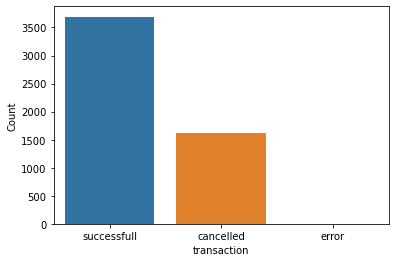

In [11]:
#Визуализируем с помощью барплота получившийся результат
import seaborn as sns
sns.barplot(x='transaction', y='Count', data=transaction_type)

In [12]:
#Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

#Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

#по оси x – число транзакций
#по оси y – доля пользователей с таким числом транзакций


In [13]:
name_transaction=df.query('transaction == "successfull"').groupby('name', as_index=False).agg({'transaction' : 'count'})

In [14]:
name_transaction.head(3)

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63


In [15]:
total_transaction=name_transaction.transaction.sum()

In [16]:
name_transaction['share']=name_transaction.transaction/total_transaction

<AxesSubplot:xlabel='transaction', ylabel='share'>

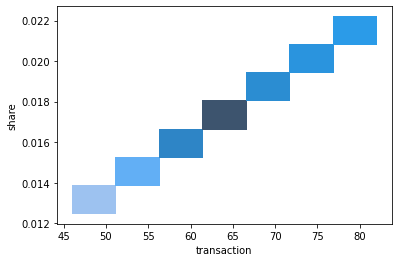

In [17]:
sns.histplot(x='transaction', y='share', data=name_transaction)

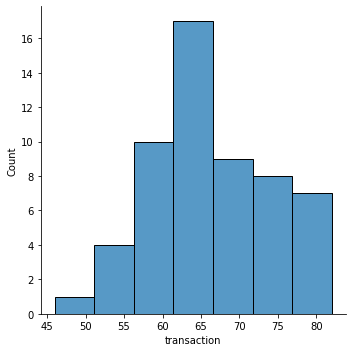

In [18]:
sns.displot(name_transaction.transaction)

In [19]:
#около 25% совершили менее 61 транзакции, минимальное значение - 46, максимальное - 82

name_transaction.describe()

,transaction,share
count,56.000000,56.000000
mean,65.928571,0.017857
std,7.787769,0.002109
min,46.000000,0.012459
25%,61.000000,0.016522
50%,64.000000,0.017335
75%,72.000000,0.019502
max,82.000000,0.022210


In [20]:
#К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

#столбцы – имена пользователей
#строки – минута времени осуществления операции (minute)
#значения – число совершённых операций
#Пропущенные значения заполните нулями.

#Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

df_updated=pd.read_csv('D:/KARPOV/5_transaction_data_updated.csv')

In [21]:
df_updated.head(3)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6


In [81]:
df2_name_transaction = df_updated.groupby(['minute', 'name'], as_index=False).agg({'transaction':'count'})

In [82]:
df2_name_transaction.head(3)

,minute,name,transaction
0,0,Ekaterina_Fedorova,3
1,0,Ekaterina_Ivanova,4
2,0,Ekaterina_Lesnova,2


In [83]:
user_vs_minute_pivot = df2_name_transaction.pivot(index='minute', columns='name', values='transaction').fillna(0)

In [84]:
user_vs_minute_pivot.head(3)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0


<AxesSubplot:xlabel='minute', ylabel='count'>

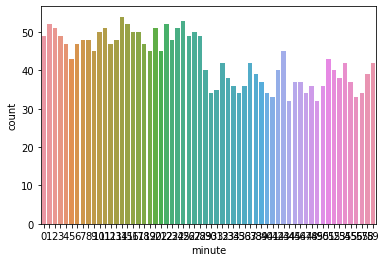

In [86]:
#общее число транзакций в минуту. Получился сложно интерпретируемый график
sns.countplot(x='minute',data=df2_name_transaction)

In [87]:
df2_name_transaction.head()

,minute,name,transaction
0,0,Ekaterina_Fedorova,3
1,0,Ekaterina_Ivanova,4
2,0,Ekaterina_Lesnova,2
3,0,Ekaterina_Ozerova,3
4,0,Ekaterina_Petrova,4


In [89]:
#Исправьте ошибку коллеги (если она есть), и посчитайте число минут, прошедших с начала дня. 
#Результат сохраните в колонку true_minute. Постройте график, 
#как в предыдущем шаге, и посмотрите, произошли ли изменения.
import datetime as dt
df_updated['date'] = pd.to_datetime(df_updated['date'])

In [91]:
df_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
counted               float64
dtype: object

In [97]:
df_updated['true_minute']=df_updated.date.dt.minute + df_updated.date.dt.hour * 60

In [108]:
df_updated.head(3)

,date,name,transaction,minute,counted,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,NaN,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,NaN,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,NaN,66


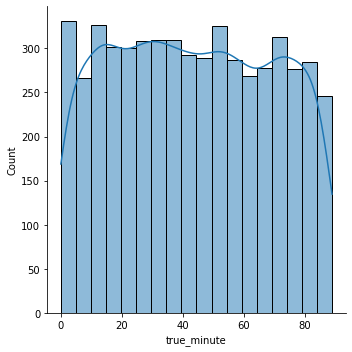

In [105]:
#график теперь выглядит понятнее, также как и правдивее: транзакции совершаются примерно в равном количестве за минуты
sns.displot(x='true_minute',data=df_updated, kde=True)